<a href="https://colab.research.google.com/github/PosgradoMNA/actividades-de-aprendizaje-A01793509/blob/main/Repaso_Regresiones_Kmeans.A01793509.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

---


🚀 **Actividad Semanal -- 7 Regresiones y K means**: Entender métodos de Regresiones y K means.

📑 **Asignatura:** Ciencia y analítica de datos

🧑 **Alumno:** Alberto José García Porras (Matrícula No. **A01793509**)

🧑 **Profesora**: María de la Paz Rico Fernández

📅 Noviembre 07 del 2022

---

# Linear Models


- In supervised learning, the training data fed to the algorithm includes the desired solutions, called labels. 
- In **regression**, the labels are continuous quantities.
- Linear models predict by computing a weighted sum of input features plus a bias term.

In [1]:
import numpy as np
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
# to make this notebook's output stable across runs
np.random.seed(42)

In [2]:
5-2

3

## Simple Linear Regression

Simple linear regression equation:

$y = ax + b$
<br>
$a$: slope
<br>
$b$: intercept

Generate linear-looking data with the equation:

$y = 3X + 4 + noise$

In [3]:
np.random.rand(100, 1)

array([[0.37454012],
       [0.95071431],
       [0.73199394],
       [0.59865848],
       [0.15601864],
       [0.15599452],
       [0.05808361],
       [0.86617615],
       [0.60111501],
       [0.70807258],
       [0.02058449],
       [0.96990985],
       [0.83244264],
       [0.21233911],
       [0.18182497],
       [0.18340451],
       [0.30424224],
       [0.52475643],
       [0.43194502],
       [0.29122914],
       [0.61185289],
       [0.13949386],
       [0.29214465],
       [0.36636184],
       [0.45606998],
       [0.78517596],
       [0.19967378],
       [0.51423444],
       [0.59241457],
       [0.04645041],
       [0.60754485],
       [0.17052412],
       [0.06505159],
       [0.94888554],
       [0.96563203],
       [0.80839735],
       [0.30461377],
       [0.09767211],
       [0.68423303],
       [0.44015249],
       [0.12203823],
       [0.49517691],
       [0.03438852],
       [0.9093204 ],
       [0.25877998],
       [0.66252228],
       [0.31171108],
       [0.520

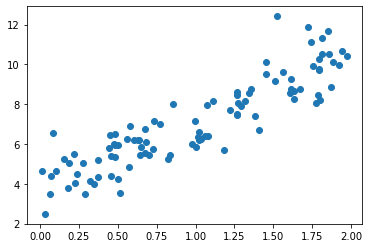

In [4]:
X = 2*np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)
plt.scatter(X, y);

In [5]:
import pandas as pd
pd.DataFrame(y)

,0
0,3.508550
1,8.050716
2,6.179208
3,6.337073
4,11.311173
...,...
95,5.441928
96,10.121188
97,9.787643
98,8.061635


In [6]:
from sklearn.linear_model import LinearRegression

linear_reg = LinearRegression(fit_intercept=True)
linear_reg.fit(X, y)

LinearRegression()

Plot the model's predictions:

In [7]:
#X_fit[]

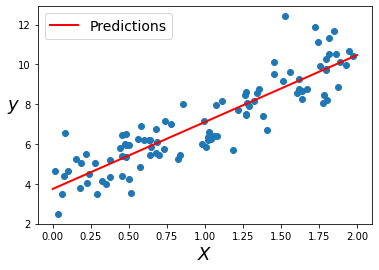

In [8]:
# construct best fit line
X_fit = np.linspace(0, 2, 100)
y_fit = linear_reg.predict(X_fit[:, np.newaxis])

plt.scatter(X, y)
plt.plot(X_fit, y_fit, "r-", linewidth=2, label="Predictions")
plt.xlabel("$X$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.legend(loc="upper left", fontsize=14);

Predictions are a good fit.

Generate new data to make predictions with the model:

In [9]:
X_new = np.array([[0], [2]])
X_new

array([[0],
       [2]])

In [10]:
X_new.shape

(2, 1)

In [11]:
y_new = linear_reg.predict(X_new)
y_new

array([[ 3.74406122],
       [10.47517611]])

In [12]:
 linear_reg.coef_, linear_reg.intercept_

(array([[3.36555744]]), array([3.74406122]))

The model estimates:

$\hat{y} = 3.36X + 3.74$

In [13]:
#|VENTAS|GANANCIAS|
#COEF*VENTAS+B
#|VENTAS|COMPRAS|GANANCIAS|
#COEF1*X1+COEF2*X2+B=Y

## Polynomial Regression

If data is more complex than a straight line, you can use a linear model ti fit non-linear data adding powers of each feature as new features and then train a linear model on the extended set of features. 

$$y = a_0 + a_1x_1 + a_2x_2 + a_3x_3 + ...$$ to $$y = a_0 + a_1x + a_2x^2 + a_3x^3+ ...$$ 

This is still a linear model, the linearity refers to the fact that the coefficients never multiply or divide each other.

To generate polynomial data we use the function:

$y = 0.50X^2 + X + 2 + noise$

In [14]:
# generate non-linear data e.g. quadratic equation
m = 100
X = 6 * np.random.rand(m, 1) - 3
y = 0.5 * X**2 + X + 2 + np.random.randn(m, 1)

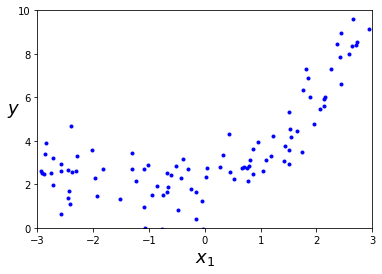

In [15]:
plt.plot(X, y, "b.")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.axis([-3, 3, 0, 10]);

In [16]:
import pandas as pd
pd.DataFrame(y)

,0
0,8.529240
1,3.768929
2,3.354423
3,2.747935
4,0.808458
...,...
95,5.346771
96,6.338229
97,3.488785
98,1.372002


Now we can use `PolynomialFeatues` to transform training data adding the square of each feature as new features.

In [17]:
from sklearn.preprocessing import PolynomialFeatures

poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly_features.fit_transform(X)

In [18]:
X_poly

array([[ 2.72919168e+00,  7.44848725e+00],
       [ 1.42738150e+00,  2.03741795e+00],
       [ 3.26124315e-01,  1.06357069e-01],
       [ 6.70324477e-01,  4.49334905e-01],
       [-4.82399625e-01,  2.32709399e-01],
       [-1.51361406e+00,  2.29102753e+00],
       [-8.64163928e-01,  7.46779295e-01],
       [ 1.54707666e+00,  2.39344620e+00],
       [-2.91363907e+00,  8.48929262e+00],
       [-2.30356416e+00,  5.30640783e+00],
       [-2.72398415e+00,  7.42008964e+00],
       [-2.75562719e+00,  7.59348119e+00],
       [ 2.13276350e+00,  4.54868016e+00],
       [ 1.22194716e+00,  1.49315485e+00],
       [-1.54957025e-01,  2.40116797e-02],
       [-2.41299504e+00,  5.82254504e+00],
       [-5.03047493e-02,  2.53056780e-03],
       [-1.59169375e-01,  2.53348900e-02],
       [-1.96078878e+00,  3.84469264e+00],
       [-3.96890105e-01,  1.57521755e-01],
       [-6.08971594e-01,  3.70846402e-01],
       [ 6.95100588e-01,  4.83164828e-01],
       [ 8.10561905e-01,  6.57010602e-01],
       [-2.

`X_poly` now contains the original feature of X plus the square of the feature:

In [19]:
print(X[0])
print(X[0]*X[0])


[2.72919168]
[7.44848725]


In [20]:
X_poly[0]

array([2.72919168, 7.44848725])

Fit the model to this extended training data:

In [21]:
lin_reg = LinearRegression(fit_intercept=True)
lin_reg.fit(X_poly, y)
lin_reg.coef_, lin_reg.intercept_

(array([[1.04271531, 0.50866711]]), array([2.01873554]))

The model estimates:

$\hat{y} =  0.89X +0.48X^2 + 2.09$

Plot the data and the predictions:

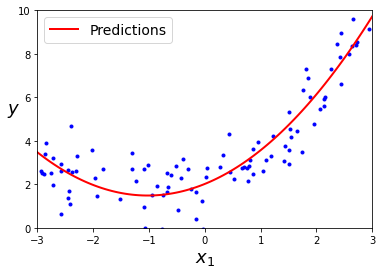

In [22]:
X_new=np.linspace(-3, 3, 100).reshape(100, 1)
X_new_poly = poly_features.transform(X_new)
y_new = lin_reg.predict(X_new_poly)
plt.plot(X, y, "b.")
plt.plot(X_new, y_new, "r-", linewidth=2, label="Predictions")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.legend(loc="upper left", fontsize=14)
plt.axis([-3, 3, 0, 10]);

## R square

R² es una medida estadística de qué tan cerca están los datos de la línea de regresión ajustada. También se conoce como el coeficiente de determinación o el coeficiente de determinación múltiple para la regresión múltiple. Para decirlo en un lenguaje más simple, R² es una medida de ajuste para los modelos de regresión lineal.



R² no indica si un modelo de regresión se ajusta adecuadamente a sus datos. Un buen modelo puede tener un valor R² bajo. Por otro lado, un modelo sesgado puede tener un valor alto de R².

 SSres + SSreg = SStot, R² = Explained variation / Total Variation
 
 ![image.png](https://i.stack.imgur.com/xb1VY.png)
 
![image.png](https://3.bp.blogspot.com/-MFqQLwbGwd4/WMO7tz39beI/AAAAAAAAF9I/Bjpfohgv_5E4lu7HzHJBQtXsBM--byqPwCLcB/s1600/rsquared.png)


# Ejercicio 1

Utiliza la base de datos de 
https://www.kaggle.com/vinicius150987/manufacturing-cost

Suponga que trabaja como consultor de una empresa de nueva creación que busca desarrollar un modelo para estimar el costo de los bienes vendidos a medida que varían el volumen de producción (número de unidades producidas). La startup recopiló datos y le pidió que desarrollara un modelo para predecir su costo frente a la cantidad de unidades vendidas.

In [23]:
import pandas as pd
df = pd.read_csv('https://raw.githubusercontent.com/marypazrf/bdd/main/EconomiesOfScale.csv')
df.sample(10)

,Number of Units,Manufacturing Cost
968,7.065653,27.804027
212,3.372115,41.127212
416,4.194513,43.832711
677,5.068888,41.225741
550,4.604122,37.569764
764,5.389522,31.191501
386,4.104190,42.988730
339,3.942214,46.291435
82,2.665856,48.578425
487,4.399514,37.567914


In [24]:
X = df[['Number of Units']]
y = df['Manufacturing Cost']

In [25]:
len(X)

1000

In [26]:
y.describe

<bound method NDFrame.describe of 0      95.066056
1      96.531750
2      73.661311
3      95.566843
4      98.777013
         ...    
995    23.855067
996    27.536542
997    25.973787
998    25.138311
999    21.547777
Name: Manufacturing Cost, Length: 1000, dtype: float64>

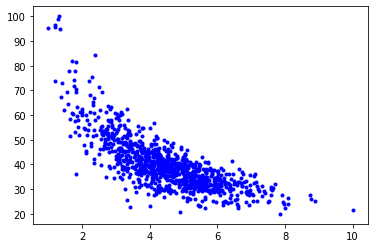

In [27]:
plt.plot(X,y,'b.')

✍

---

1.  Divide los datos del costo de manufactura. Utiliza la función train_test_split (viene el ejemplo al final del notebook).


---


In [28]:
#lineal

#Dividimos los datos con la función train_test_split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1, random_state = 101)

✍

---


2.   Realiza la **Regresión Lineal**: modelo generado (ecuación), su visualización, sus errores y r cuadrada.


---

In [29]:
#Realizamos la regresión lineal
linear_reg = LinearRegression(fit_intercept=True)
linear_reg.fit(X_train, y_train)

#Construimos la mejor línea de ajuste
X_fit = np.linspace(0, 10, 100)
y_fit = linear_reg.predict(X_fit[:, np.newaxis])

#Obtenemos la pendiente (a) y la intercepción (b)
print("Pendiente igual a", linear_reg.coef_)
print("Intercepción igual a", linear_reg.intercept_)

Pendiente igual a [-5.98882699]
Intercepción igual a 66.83650741226988


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  "X does not have valid feature names, but"


---


🔢 La ecuación para nuestro modelo de regresión lineal generado es igual a:


---
### y^ = -5.98X + 66.83

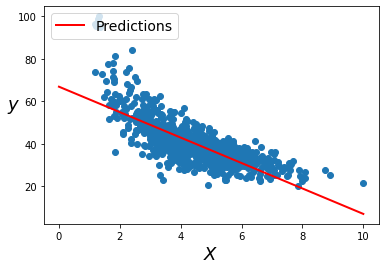

In [30]:
#Visualizamos nuestro modelo
plt.scatter(X_train, y_train)
plt.plot(X_fit, y_fit, "r-", linewidth=2, label="Predictions")
plt.xlabel("$X$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.legend(loc="upper left", fontsize=14);

In [32]:
#Obtenemos los errores y R2
from sklearn import metrics
from sklearn.metrics import r2_score

print('*****************************')
print('Los errores de mi modelo son:')
print('*****************************')
print('Error medio Absoluto (MAE):', metrics.mean_absolute_error(y_test, y_fit))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_fit)))
print("")
print('*****************************')
print('Mi R cuadrada es igual a:')
print('*****************************')
print('r2_score',r2_score(y_test, y_fit))

*****************************
Los errores de mi modelo son:
*****************************
Error medio Absoluto (MAE): 17.04846730203102
Root Mean Squared Error: 21.45395605907538

*****************************
Mi R cuadrada es igual a:
*****************************
r2_score -2.537148714527668


✍

---


3.   Realiza la **Regresión Polinomial completa**: tu modelo generado (ecuación), su visualización, sus errores y r cuadrada.


---

In [33]:
##Realizamos la regresión polinomial
#Importamos la librería
from sklearn.preprocessing import PolynomialFeatures

#Instanciamos el modelo polinomial grado 2 y asignamos a X_poly el valor del atributo de X_train y el mismo atributo al cuadrado
poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_mipoly = poly_features.fit_transform(X_train)

#Visualizamos el contenido de X_poly
X_mipoly

array([[ 7.97424764, 63.58862541],
       [ 1.89573077,  3.59379517],
       [ 3.5765014 , 12.79136229],
       ...,
       [ 3.94046305, 15.52724904],
       [ 4.52448429, 20.4709581 ],
       [ 5.86814353, 34.43510849]])

In [34]:
#Validamos que efectivamente obtengamos el valor del atributo y su valor al cuadrado
print(X_mipoly[0])
print(X_mipoly[0]*X_mipoly[0])

[ 7.97424764 63.58862541]
[  63.58862541 4043.51328129]


In [35]:
#Preparamos el modelo según los datos polinomiales generados
lin_reg = LinearRegression(fit_intercept=True)
lin_reg.fit(X_mipoly, y_train)

#Construimos la mejor línea de ajuste
X_fit_pol = np.linspace(0, 10, 100)
y_fit_pol = linear_reg.predict(X_fit_pol[:, np.newaxis])

#Obtenemos la pendiente (a) y la intercepción (b)
print("Pendiente igual a", lin_reg.coef_)
print("Intercepción igual a", lin_reg.intercept_)

Pendiente igual a [-16.40638102   1.13136095]
Intercepción igual a 88.80179909112496


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  "X does not have valid feature names, but"


---


🔢 La ecuación para nuestro modelo de regresión polinomial generado es igual a:


---
### y^ = -16.40X + 1.31X2 + 88.80

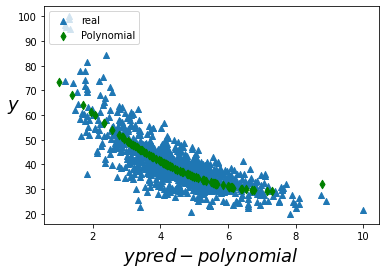

In [36]:
#Visualizamos nuestro modelo
#Obtenemos primero nuestra predicción
X_new_poly = poly_features.transform(X_test)
y_new = lin_reg.predict(X_new_poly)

#Ordenamos los datos
Orden_X = np.argsort(X_test.values.ravel())
sortedX = X_test.values.ravel()[Orden_X]
sortedY = y_test.values[Orden_X]
sorted_pred = y_new[Orden_X]

#Visualizamos nuestro modelo
plt.scatter(X_train, np.ravel(y_train), marker='^', label='real')  
plt.scatter(sortedX, sorted_pred, marker='d', label='Polynomial', color='g')
plt.xlabel("$ypred-polynomial$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.legend(loc="upper left", fontsize=14)
plt.legend(loc=2)
plt.show()

In [37]:
print('*****************************************')
print('Los errores de mi modelo polinomial son:')
print('*****************************************')
print('Error medio Absoluto (MAE):', metrics.mean_absolute_error(y_test, y_new))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_new)))
print("")
print('*****************************')
print('Mi R cuadrada es igual a:')
print('*****************************')
print('r2_score',r2_score(y_test, y_new))

*****************************************
Los errores de mi modelo polinomial son:
*****************************************
Error medio Absoluto (MAE): 4.3833025759681075
Root Mean Squared Error: 5.832771301068425

*****************************
Mi R cuadrada es igual a:
*****************************
r2_score 0.7385501224942536


✍

---


4.   Realiza la **regresión con Ridge y Lasso**: incluye la ecuación de tu modelo, visualización , errores y r cuadrada.


---

📉 **Modelo RIDGE**

In [38]:
#Importamos los modelos de la librería "sklearn"
from sklearn.linear_model import Lasso, Ridge

#Instanciamos el modelo ridge
Mod_Ridge = Ridge(alpha=0.1, solver="cholesky")

#Ajustamos el modelo
Regresion_Ridge = Mod_Ridge.fit(X_train, np.ravel(y_train))

#Realizamos la predicción
X_fit_ridge = np.linspace(0, 10, 900)
y_pred_ridge = Regresion_Ridge.predict(X_test)
  
#Obtenemos la pendiente (a) y la intercepción (b)
print("Pendiente igual a", Regresion_Ridge.coef_)
print("Intercepción igual a", Regresion_Ridge.intercept_)


Pendiente igual a [-5.98844997]
Intercepción igual a 66.83482072458477


---


🔢 La ecuación para nuestro modelo de regresión ridge generado es igual a:


---
### y^ = -5.98X + 66.83

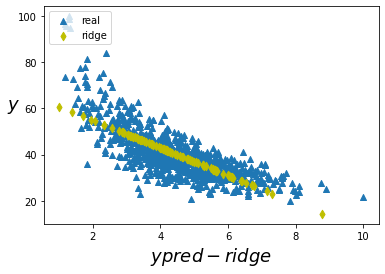

In [39]:
#Ordenamos los datos
Orden_X = np.argsort(X_test.values.ravel())
sortedX = X_test.values.ravel()[Orden_X]
sortedY = y_test.values[Orden_X]
sorted_pred = y_pred_ridge[Orden_X]
#Visualizamos nuestro modelo
plt.scatter(X_train, np.ravel(y_train), marker='^', label='real')  
plt.scatter(sortedX, sorted_pred, marker='d', label='ridge', color='y')
plt.xlabel("$ypred-ridge$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.legend(loc="upper left", fontsize=14)
plt.legend(loc=2)
plt.show()

In [40]:
print('*****************************************')
print('Los errores de mi modelo de regresión ridge son:')
print('*****************************************')
print('Error medio Absoluto (MAE):', metrics.mean_absolute_error(y_test, y_pred_ridge))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred_ridge)))
print("")
print('*****************************')
print('Mi R cuadrada es igual a:')
print('*****************************')
print('r2_score',r2_score(y_test, y_pred_ridge))

*****************************************
Los errores de mi modelo de regresión ridge son:
*****************************************
Error medio Absoluto (MAE): 5.013640302610032
Root Mean Squared Error: 7.109005479179772

*****************************
Mi R cuadrada es igual a:
*****************************
r2_score 0.6116205486880515


---


📉 **Modelo LASSO**


---

In [41]:
#Instanciamos el modelo lasso
Mod_Lasso = Lasso(alpha=30)

#Ajustamos el modelo
Regresion_Lasso = Mod_Lasso.fit(X_train, np.ravel(y_train))

#Realizamos la predicción
X_fit_lasso = np.linspace(0, 10, 900)
y_pred_lasso = Regresion_Lasso.predict(X_test)
  
#Obtenemos la pendiente (a) y la intercepción (b)
print("Pendiente igual a", Regresion_Lasso.coef_)
print("Intercepción igual a", Regresion_Lasso.intercept_)

Pendiente igual a [-0.]
Intercepción igual a 40.044068093688885


---


🔢 La ecuación para nuestro modelo de regresión lasso generado es igual a:


---
### y^ = -0X + 40.04

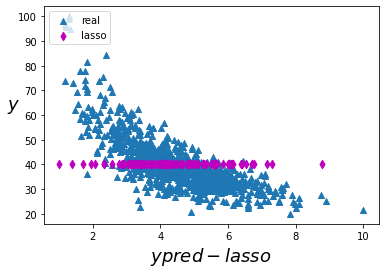

In [42]:
#Ordenamos los datos
Orden_X = np.argsort(X_test.values.ravel())
sortedX = X_test.values.ravel()[Orden_X]
sortedY = y_test.values[Orden_X]
sorted_pred = y_pred_lasso[Orden_X]
#Visualizamos nuestro modelo
plt.scatter(X_train, np.ravel(y_train), marker='^', label='real')  
plt.scatter(sortedX, sorted_pred, marker='d', label='lasso', color='m')
plt.xlabel("$ypred-lasso$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.legend(loc="upper left", fontsize=14)
plt.legend(loc=2)
plt.show()

In [43]:
print('*****************************************')
print('Los errores de mi modelo de regresión ridge son:')
print('*****************************************')
print('Error medio Absoluto (MAE):', metrics.mean_absolute_error(y_test, y_pred_lasso))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred_lasso)))
print("")
print('*****************************')
print('Mi R cuadrada es igual a:')
print('*****************************')
print('r2_score',r2_score(y_test, y_pred_lasso))

*****************************************
Los errores de mi modelo de regresión ridge son:
*****************************************
Error medio Absoluto (MAE): 8.173133499816442
Root Mean Squared Error: 11.407593526938278

*****************************
Mi R cuadrada es igual a:
*****************************
r2_score -6.130156795136621e-05


✍

---


5.   Finalmente grafica:
  *   MAE (de los cuatro métodos)
  *   R2 (de los cuatro métodos)


---

/usr/local/lib/python3.7/dist-packages/numpy/lib/stride_tricks.py:536: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  args = [np.array(_m, copy=False, subok=subok) for _m in args]



******* Valores de MAE ********
{'REGRESSION': [17.04846730203102], 'POLYNOMIAL': 4.3833025759681075, 'RIDGE': [5.013640302610032], 'LASSO': 8.173133499816442}
*******************************


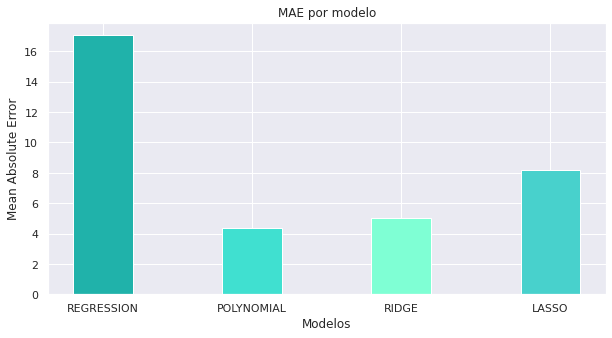

In [84]:
#Graficamos inicialmente MAE para los cuatro modelos

#Preparamos los datos
data_MAE = {'REGRESSION': [metrics.mean_absolute_error(y_test, y_fit)],
        'POLYNOMIAL': metrics.mean_absolute_error(y_test, y_new),
        'RIDGE': [metrics.mean_absolute_error(y_test, y_pred_ridge)],
        'LASSO': metrics.mean_absolute_error(y_test, y_pred_lasso)}
#Ajustamos la paleta de colores
colores_MAE={'aquamarine', 'turquoise', 'mediumturquoise', 'lightseagreen'}

#Capturamos los valores a enviar al bar plot
errores_MAE = list(data_MAE.keys())
values_MAE = list(data_MAE.values())
fig = plt.figure(figsize = (10, 5))
 
#Enviamos los valores al bar plot
plt.bar(errores_MAE, values_MAE, color =colores_MAE, width = 0.4)

print("")
print("******* Valores de MAE ********")
print(data_MAE)
print("*******************************")

#Visualizamos el bar plot
plt.xlabel("Modelos")
plt.ylabel("Mean Absolute Error")
plt.title("MAE por modelo")
plt.show()


******* Valores de R2 ********
{'REGRESSION': 21.45395605907538, 'POLYNOMIAL': 5.832771301068425, 'RIDGE': 7.109005479179772, 'LASSO': 11.407593526938278}
*******************************


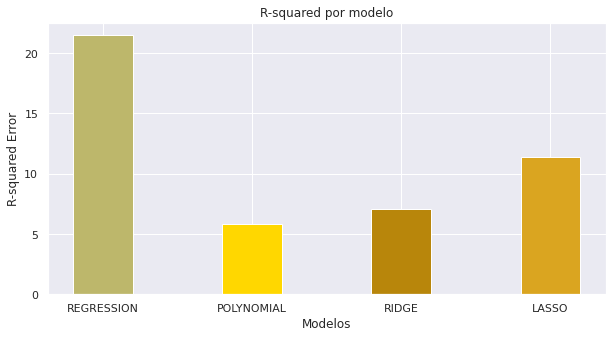

In [85]:
#Graficamos inicialmente R2 para los cuatro modelos

#Preparamos los datos
data_R2 = {'REGRESSION': np.sqrt(metrics.mean_squared_error(y_test, y_fit)),
        'POLYNOMIAL': np.sqrt(metrics.mean_squared_error(y_test, y_new)),
        'RIDGE': np.sqrt(metrics.mean_squared_error(y_test, y_pred_ridge)),
        'LASSO': np.sqrt(metrics.mean_squared_error(y_test, y_pred_lasso))}
#Ajustamos la paleta de colores
colores_R2={'gold', 'goldenrod', 'darkgoldenrod', 'darkkhaki'}

#Capturamos los valores a enviar al bar plot
errores_R2 = list(data_R2.keys())
values_R2 = list(data_R2.values())
fig = plt.figure(figsize = (10, 5))
 
#Enviamos los valores al bar plot
plt.bar(errores_R2, values_R2, color =colores_R2, width = 0.4)

print("")
print("******* Valores de R2 ********")
print(data_R2)
print("*******************************")

#Visualizamos el bar plot
plt.xlabel("Modelos")
plt.ylabel("R-squared Error")
plt.title("R-squared por modelo")
plt.show()

✍

---


6.   Explica tus resultados, que método conviene más a la empresa, ¿por que?

Analizando los resultados obtenidos, recomendaría a la empresa utilizar el modelo **Polynomial de 2do grado** con la fórmula **y^ = -16.40X + 1.31X2 + 88.80** por las siguientes razones:

1.   Analizando la distribución que tienen los datos, observamos que no siguen una línea recta, por lo cual, utilizar un modelo líneal no brindará resultados confiables, adicionalmente el uso de una potencia para ajustar los atributos del conjunto nos permitirá una mejor adaptación dada la distribución de los datos.

2.   El modelo polynomial presenta menor error para las métricas MAE y R-Squared, comparándolo con los otros modelos, sabemos que entre más cercano a cero se encuentre el error, mejor se asumirán las predicciones del modelo.

3.   Visualmente podemos observar en la gráfica del punto 3 que las predicciones del modelo polynomial se adaptan mejor a los puntos de los datos comparándolas con las gráficas de los otros modelos. De igual forma, no se observa un sobreajuste en la adaptación de las predicciones demostrando de esta forma un óptimo desempeño.
---

#Ejercicio 2
Realiza la regresión polinomial de los siguientes datos:

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/marypazrf/bdd/main/kc_house_data.csv')
df.sample(10)

In [ ]:
df.info()

In [ ]:
df.describe()

In [ ]:
df.drop('id', axis = 1, inplace = True)
df.drop('date', axis = 1, inplace = True)
df.drop('zipcode', axis = 1, inplace = True)
df.drop('lat', axis = 1, inplace = True)
df.drop('long', axis = 1, inplace = True)


In [ ]:
plt.figure(figsize=(12,8)) 
sns.heatmap(df.corr(), annot=True, cmap='Dark2_r', linewidths = 2)
plt.show()

In [ ]:
columns = df.columns.drop('price')

features = columns
label = ['price']

X = df[features]
y = df[label]

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1, random_state = 101)

print(f'Numero total de registros en la bdd: {len(X)}')
print("*****"*10)
print(f'Numero total de registros en el training set: {len(X_train)}')
print(f'Tamaño de X_train: {X_train.shape}')
print("*****"*10)
print(f'Mumero total de registros en el test dataset: {len(X_test)}')
print(f'Tamaño del X_test: {X_test.shape}')

In [ ]:
#tu codigo aquí